Epoch 1/11
352/352 [==============================] - 5s 12ms/step - loss: 1.9644 - accuracy: 0.2976 - val_loss: 1.8698 - val_accuracy: 0.3340
Epoch 2/11
352/352 [==============================] - 3s 9ms/step - loss: 1.8012 - accuracy: 0.3676 - val_loss: 1.7880 - val_accuracy: 0.3656
Epoch 3/11
352/352 [==============================] - 3s 9ms/step - loss: 1.7360 - accuracy: 0.3897 - val_loss: 1.7451 - val_accuracy: 0.3816
Epoch 4/11
352/352 [==============================] - 3s 8ms/step - loss: 1.6878 - accuracy: 0.4089 - val_loss: 1.7239 - val_accuracy: 0.3856
Epoch 5/11
352/352 [==============================] - 3s 9ms/step - loss: 1.6513 - accuracy: 0.4220 - val_loss: 1.6688 - val_accuracy: 0.4160
Epoch 6/11
352/352 [==============================] - 3s 9ms/step - loss: 1.6191 - accuracy: 0.4327 - val_loss: 1.6298 - val_accuracy: 0.4336
Epoch 7/11
352/352 [==============================] - 3s 9ms/step - loss: 1.5893 - accuracy: 0.4445 - val_loss: 1.6212 - val_accuracy: 0.4258
Epoch

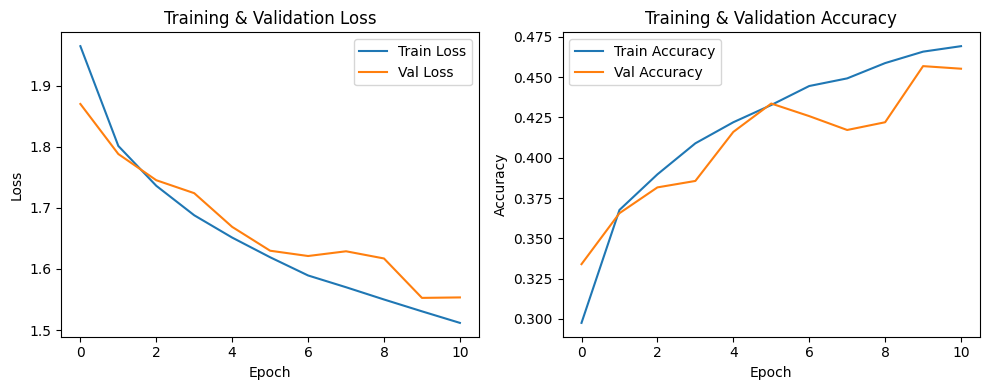

In [3]:
# ============================================================
# Feedforward Neural Network for CIFAR-10 (LP-IV Problems 1 & 2)
# ============================================================

# a. Import the necessary packages
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# b. Load the training and testing data
train = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
test = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')

# Separate features and labels
X_train = train.drop('label', axis=1).values
y_train = train['label'].values

X_test = test.drop('label', axis=1).values
y_test = test['label'].values

# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# ------------------------------------------------------------
# c. Define the network architecture using Keras
# ------------------------------------------------------------
# Common base input shape (for CIFAR-10: 32×32×3 = 3072)
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(3072,)),

    # ↓ Alternative for Problem 2 (Adam optimizer version):
    # layers.Dense(1024, activation='relu', input_shape=(3072,)),
    # layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),

    # ↓ Alternative for Problem 2 (Adam version):
    # layers.Dropout(0.3),
    # layers.Dense(256, activation='relu'),

    layers.Dense(10, activation='softmax')  # 10 output classes
])

# ------------------------------------------------------------
# d. Compile and train the model
# ------------------------------------------------------------

# Problem 1 → Use SGD optimizer
optimizer_choice = keras.optimizers.SGD()

# Problem 2 → Use Adam optimizer
# optimizer_choice = keras.optimizers.Adam()

model.compile(optimizer=optimizer_choice,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=11, batch_size=128,
                    validation_split=0.1)

# ------------------------------------------------------------
# e. Evaluate the network
# ------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# ------------------------------------------------------------
# f. Plot the training loss and accuracy
# ------------------------------------------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
